# Deviations from Normality

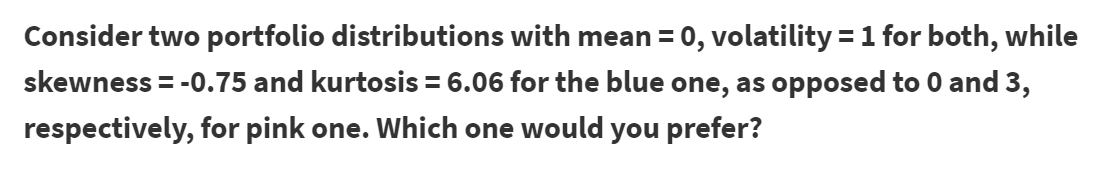

The positive excess kurtosis and the negative skewness suggest that large losses are likely with the blue distribution compared to the pink distribution. 

For this reason the blue distribution would be less attractive to rational investors, so choose Pink  

Skewness preferbly higher than 0

Kurtosis normally should higher than 3

In a negatively skewed distribution, the mean is usually less than the median because the few low scores tend to shift the mean to the left. As a result, if the mean is lower than the median, then the probability of an outcome above the mean is higher than the probability of an outcome below the mean. 

using volatility as a risk estimate for a negatively skew distribution may lead to underestimate the tail risk associated to strong negative returns.

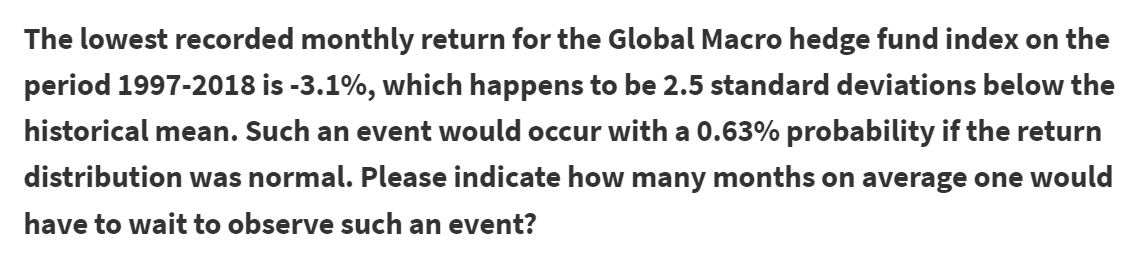

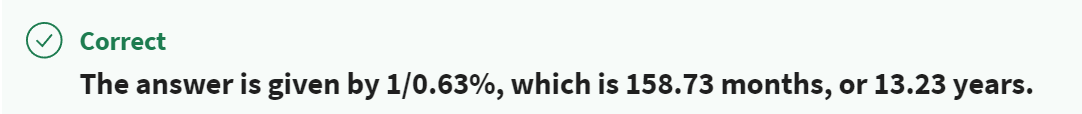

In [2]:
1/0.0063

158.73015873015873

Asset Returns are not normally distributed

Deviations from normality can be severe

Lab Session-Building your own modules

In [3]:
# Building Modules

import pandas as pd
import numpy as np

In [4]:
%load_ext autoreload

In [5]:
%autoreload 2

In [6]:
import edhec_risk_kit as erk
returns=erk.get_ffme_returns()

d:\Github repositories\Programming-Study\Investment Management with Python and Machine Learning\Introduction to Portfolio Construction and Analysis with Python\week1\edhec_risk_kit.py:24: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  me_m=pd.read_csv('Portfolios_Formed_on_ME_monthly_EW.csv',


In [7]:
returns.head()

,SmallCap,LargeCap
1926-07,-0.0145,0.0329
1926-08,0.0512,0.0370
1926-09,0.0093,0.0067
1926-10,-0.0484,-0.0243
1926-11,-0.0078,0.0270


In [8]:
erk.drawdown(returns['SmallCap'])['Drawdown'].min()

-0.8330007793945303

#Downside risk measures

Semi-deviation is the volatility of the sub-sample of below-average or below-zero returns

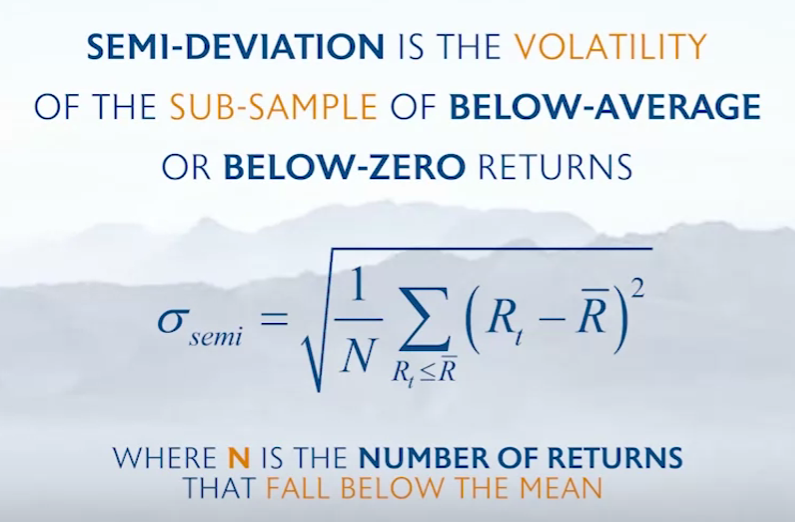

VaR: Value at Risk, maximum potential loss threshold.

At a specified confidence level - 99 %

over a specified time period over 1 month

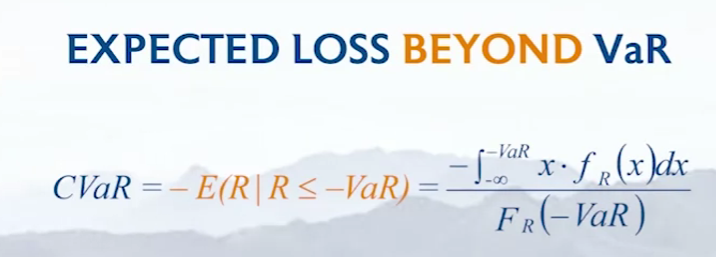

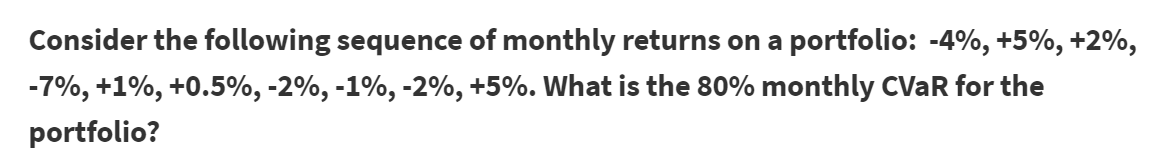

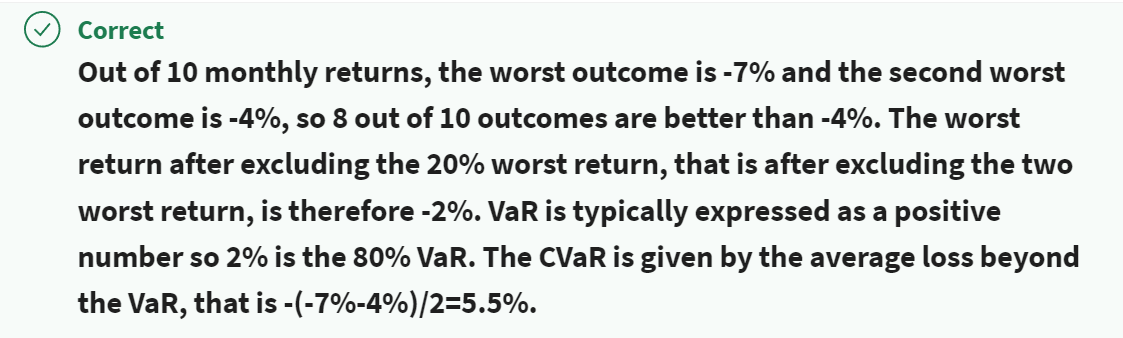

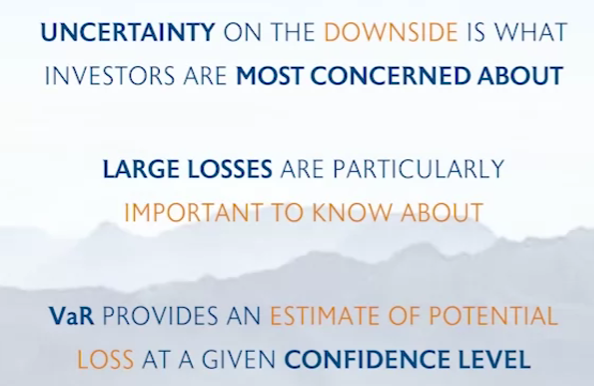

# Lab Session-Deviations from Normality

In [9]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import edhec_risk_kit as erk

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
hfi=erk.get_hfi_returns()
hfi.head()

d:\Github repositories\Programming-Study\Investment Management with Python and Machine Learning\Introduction to Portfolio Construction and Analysis with Python\week1\edhec_risk_kit.py:36: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  hfi=pd.read_csv('edhec-hedgefundindices.csv',


,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
1997-01,0.0119,0.0393,0.0178,0.0791,0.0189,0.0213,0.0191,0.0573,0.0281,0.0150,0.0180,-0.0166,0.0317
1997-02,0.0123,0.0298,0.0122,0.0525,0.0101,0.0084,0.0122,0.0175,-0.0006,0.0034,0.0118,0.0426,0.0106
1997-03,0.0078,-0.0021,-0.0012,-0.0120,0.0016,-0.0023,0.0109,-0.0119,-0.0084,0.0060,0.0010,0.0778,-0.0077
1997-04,0.0086,-0.0170,0.0030,0.0119,0.0119,-0.0005,0.0130,0.0172,0.0084,-0.0001,0.0122,-0.0129,0.0009
1997-05,0.0156,-0.0015,0.0233,0.0315,0.0189,0.0346,0.0118,0.0108,0.0394,0.0197,0.0173,-0.0737,0.0275


In [11]:
# median return lower than mean return
pd.concat([hfi.mean(),hfi.median(),hfi.mean()>hfi.median()], axis='columns')

,0,1,2
Convertible Arbitrage,0.005508,0.0065,False
CTA Global,0.004074,0.0014,True
Distressed Securities,0.006946,0.0089,False
Emerging Markets,0.006253,0.0096,False
Equity Market Neutral,0.004498,0.0051,False
Event Driven,0.006344,0.0084,False
Fixed Income Arbitrage,0.004365,0.0055,False
Global Macro,0.005403,0.0038,True
Long/Short Equity,0.006331,0.0079,False
Merger Arbitrage,0.005356,0.0060,False


Skewness formula:

$$ S(R)=\frac{E[(R-E(R))^3]}{\sigma_R^3} $$

In [12]:
erk.skewness(hfi).sort_values()

Fixed Income Arbitrage   -3.940320
Convertible Arbitrage    -2.639592
Equity Market Neutral    -2.124435
Relative Value           -1.815470
Event Driven             -1.409154
Merger Arbitrage         -1.320083
Distressed Securities    -1.300842
Emerging Markets         -1.167067
Long/Short Equity        -0.390227
Funds Of Funds           -0.361783
CTA Global                0.173699
Short Selling             0.767975
Global Macro              0.982922
dtype: float64

In [13]:
import scipy.stats
scipy.stats.skew(hfi)

array([-2.63959223,  0.17369864, -1.30084204, -1.16706749, -2.12443538,
       -1.40915356, -3.94032029,  0.98292188, -0.39022677, -1.32008333,
       -1.81546975,  0.76797484, -0.36178308])

In [14]:
erk.skewness(hfi)

Convertible Arbitrage    -2.639592
CTA Global                0.173699
Distressed Securities    -1.300842
Emerging Markets         -1.167067
Equity Market Neutral    -2.124435
Event Driven             -1.409154
Fixed Income Arbitrage   -3.940320
Global Macro              0.982922
Long/Short Equity        -0.390227
Merger Arbitrage         -1.320083
Relative Value           -1.815470
Short Selling             0.767975
Funds Of Funds           -0.361783
dtype: float64

In [15]:
import numpy as np

In [16]:
hfi.shape

(263, 13)

In [17]:
normal_rets=np.random.normal(0,.15,size=(263, 1))

In [18]:
erk.skewness(normal_rets)

0.07682961705861244

In [19]:
# Kurtosis

erk.kurtosis(normal_rets)

2.9048874961439908

In [20]:
erk.kurtosis(hfi)

Convertible Arbitrage     23.280834
CTA Global                 2.952960
Distressed Securities      7.889983
Emerging Markets           9.250788
Equity Market Neutral     17.218555
Event Driven               8.035828
Fixed Income Arbitrage    29.842199
Global Macro               5.741679
Long/Short Equity          4.523893
Merger Arbitrage           8.738950
Relative Value            12.121208
Short Selling              6.117772
Funds Of Funds             7.070153
dtype: float64

In [21]:
scipy.stats.kurtosis(normal_rets)

# it should be around 3, this is provided excress of 3

array([-0.0951125])

In [24]:
# jarque_bera test
scipy.stats.jarque_bera(normal_rets)

SignificanceResult(statistic=0.3578723036192956, pvalue=0.8361592849499222)

In [25]:
scipy.stats.jarque_bera(hfi)

SignificanceResult(statistic=25656.585999171337, pvalue=0.0)

In [27]:
erk.is_normal(normal_rets)

True

In [29]:
erk.is_normal(hfi)

False

In [31]:
hfi.aggregate(erk.is_normal)

Convertible Arbitrage     False
CTA Global                 True
Distressed Securities     False
Emerging Markets          False
Equity Market Neutral     False
Event Driven              False
Fixed Income Arbitrage    False
Global Macro              False
Long/Short Equity         False
Merger Arbitrage          False
Relative Value            False
Short Selling             False
Funds Of Funds            False
dtype: bool

In [32]:
ffme = erk.get_ffme_returns()
erk.skewness(ffme)
# smallcap has a positively skewness

d:\Github repositories\Programming-Study\Investment Management with Python and Machine Learning\Introduction to Portfolio Construction and Analysis with Python\week1\edhec_risk_kit.py:24: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  me_m=pd.read_csv('Portfolios_Formed_on_ME_monthly_EW.csv',


SmallCap    4.410739
LargeCap    0.233445
dtype: float64

In [33]:
erk.kurtosis(ffme)
#Enormous kurtosis for smallcap, very much fatter tails than you would expect
#So it means crashes on the one hand and the big upside swings happened far more often than you would expect if returns were normally distributed.

SmallCap    46.845008
LargeCap    10.694654
dtype: float64

In [35]:
ffme.aggregate(erk.is_normal)

SmallCap    False
LargeCap    False
dtype: bool

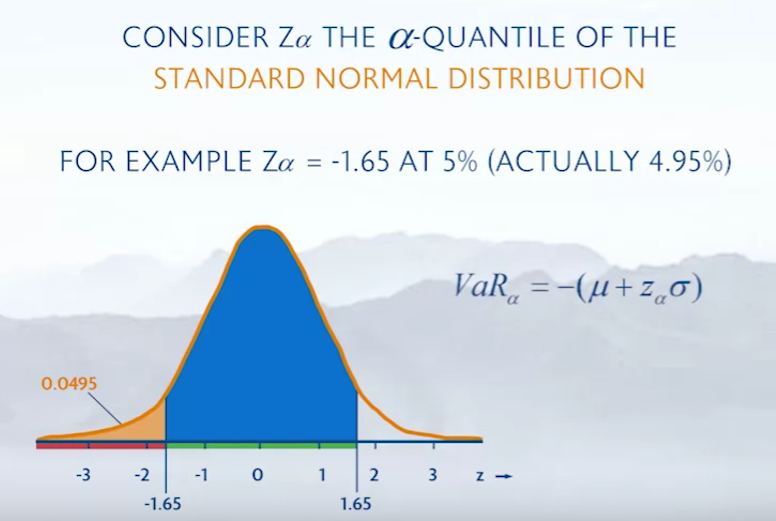

Z at 5% is -1.65
Var=-(0.005-1.65*0.04)=6.1%

Parametric is good because Mitigates

The problem of estimation risk

At the cost of model risk

Can be Parametric but Non-Gaussian

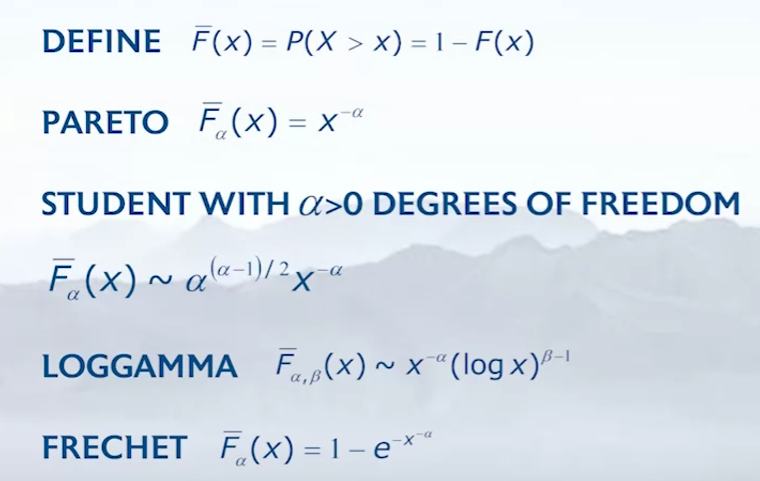

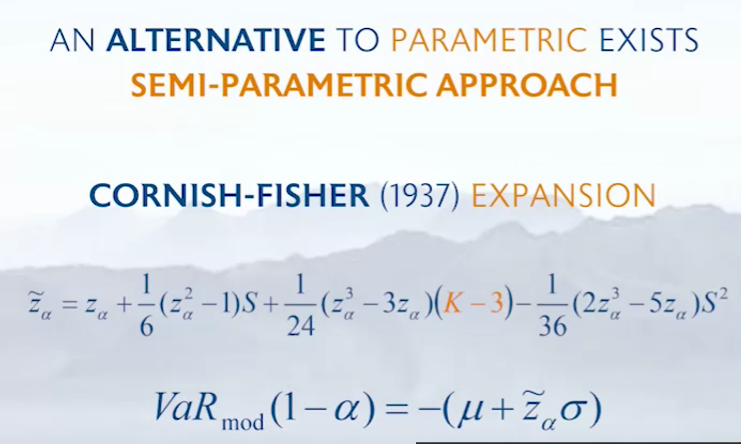

Consider an asset with a skewness equal to -1.2 and kurtosis equal to 6. Keeping in mind that Z5%, the critical value for probability 95% is -1.65, indicate what would be the modified critical value for probability 95% using the Cornish Fisher expansion.

Answer: 

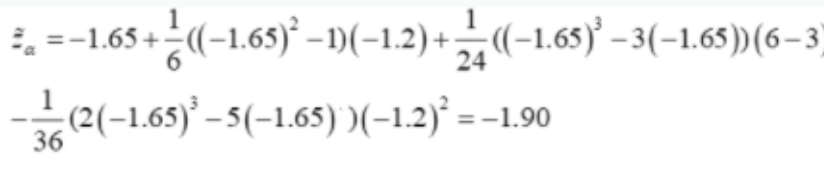

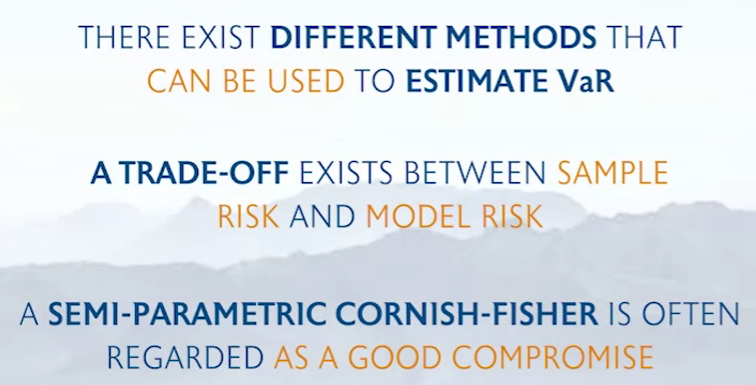

Lab Session-Semi Deviation, VAR and CVAR

In [1]:
#Downside
import pandas as pd
import edhec_risk_kit as erk
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
hfi=erk.get_hfi_returns()

# Semideviation

d:\Github repositories\Programming-Study\Investment Management with Python and Machine Learning\Introduction to Portfolio Construction and Analysis with Python\week1\edhec_risk_kit.py:36: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  hfi=pd.read_csv('edhec-hedgefundindices.csv',


In [3]:
hfi.std(ddof=0)

Convertible Arbitrage     0.016536
CTA Global                0.023290
Distressed Securities     0.017009
Emerging Markets          0.032476
Equity Market Neutral     0.008115
Event Driven              0.016712
Fixed Income Arbitrage    0.011517
Global Macro              0.014694
Long/Short Equity         0.019897
Merger Arbitrage          0.009600
Relative Value            0.011462
Short Selling             0.047655
Funds Of Funds            0.015536
dtype: float64

In [4]:
hfi[hfi<0].std(ddof=0)
# boolean mask hfi <0 


Convertible Arbitrage     0.019540
CTA Global                0.012443
Distressed Securities     0.015185
Emerging Markets          0.028039
Equity Market Neutral     0.009566
Event Driven              0.015429
Fixed Income Arbitrage    0.017763
Global Macro              0.006579
Long/Short Equity         0.014051
Merger Arbitrage          0.008875
Relative Value            0.012244
Short Selling             0.027283
Funds Of Funds            0.012122
dtype: float64

In [6]:
erk.semideviation(hfi)

Convertible Arbitrage     0.019540
CTA Global                0.012443
Distressed Securities     0.015185
Emerging Markets          0.028039
Equity Market Neutral     0.009566
Event Driven              0.015429
Fixed Income Arbitrage    0.017763
Global Macro              0.006579
Long/Short Equity         0.014051
Merger Arbitrage          0.008875
Relative Value            0.012244
Short Selling             0.027283
Funds Of Funds            0.012122
dtype: float64

In [ ]:
### VaR and CVaR

#Value at Risk

##Historic VaR
##Parametric VaR - Gaissian
##Modified Cornish-Fisher VaR

In [9]:
import numpy as np
#VaR computing
np.percentile(hfi,5,axis=0)
# interpret: -0.01576
# Interpret: There's a five percent chance that in any given month, you're going to lose about 1.5 percent or worse. 

array([-0.01576, -0.03169, -0.01966, -0.04247, -0.00814, -0.02535,
       -0.00787, -0.01499, -0.02598, -0.01047, -0.01174, -0.06783,
       -0.02047])

In [10]:
# Have a nice label for above VaR computing
def var_historic(r, level=5):
    """
    Var Historic
    """
    if isinstance(r, pd.DataFrame):
        return r.aggregate(var_historic, level=level)
    elif isinstance(r,pd.Series):
        return np.percentile(r,level)
    else:
        raise TypeError('Expected r to be Series or DataFrame')

In [11]:
var_historic(hfi)

Convertible Arbitrage    -0.01576
CTA Global               -0.03169
Distressed Securities    -0.01966
Emerging Markets         -0.04247
Equity Market Neutral    -0.00814
Event Driven             -0.02535
Fixed Income Arbitrage   -0.00787
Global Macro             -0.01499
Long/Short Equity        -0.02598
Merger Arbitrage         -0.01047
Relative Value           -0.01174
Short Selling            -0.06783
Funds Of Funds           -0.02047
dtype: float64

In [13]:
erk.var_historic(hfi)

Convertible Arbitrage    -0.01576
CTA Global               -0.03169
Distressed Securities    -0.01966
Emerging Markets         -0.04247
Equity Market Neutral    -0.00814
Event Driven             -0.02535
Fixed Income Arbitrage   -0.00787
Global Macro             -0.01499
Long/Short Equity        -0.02598
Merger Arbitrage         -0.01047
Relative Value           -0.01174
Short Selling            -0.06783
Funds Of Funds           -0.02047
dtype: float64

In [14]:
from scipy.stats import norm

In [17]:
#ppf is the percent point function, it will out the Z score at the certain significance level 
z= norm.ppf(0.05)

In [18]:
z

-1.6448536269514729

In [20]:
-(hfi.mean()+z*hfi.std(ddof=0))

Convertible Arbitrage     0.021691
CTA Global                0.034235
Distressed Securities     0.021032
Emerging Markets          0.047164
Equity Market Neutral     0.008850
Event Driven              0.021144
Fixed Income Arbitrage    0.014579
Global Macro              0.018766
Long/Short Equity         0.026397
Merger Arbitrage          0.010435
Relative Value            0.013061
Short Selling             0.080086
Funds Of Funds            0.021292
dtype: float64

In [22]:
erk.var_gaussian(hfi)

Convertible Arbitrage     0.021691
CTA Global                0.034235
Distressed Securities     0.021032
Emerging Markets          0.047164
Equity Market Neutral     0.008850
Event Driven              0.021144
Fixed Income Arbitrage    0.014579
Global Macro              0.018766
Long/Short Equity         0.026397
Merger Arbitrage          0.010435
Relative Value            0.013061
Short Selling             0.080086
Funds Of Funds            0.021292
dtype: float64

<Axes: title={'center': 'EDHEC Hedge Fund Indices: VaR'}>

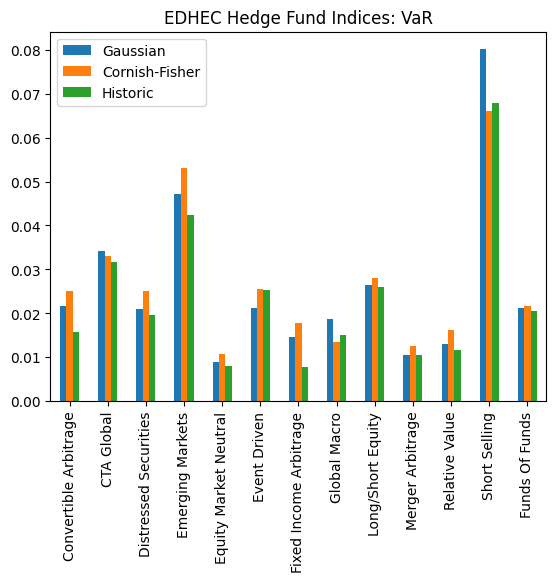

In [29]:
#Cornish-Fisher
var_list=[erk.var_gaussian(hfi),erk.var_gaussian(hfi,modified=True),erk.var_historic(hfi)]
comparison=pd.concat(var_list,axis=1)
comparison.columns=["Gaussian","Cornish-Fisher","Historic"]
comparison.plot.bar(title="EDHEC Hedge Fund Indices: VaR")
#compare three functions

In [30]:
### BeyondVaR aka CVaR

erk.cvar_historic(hfi)
#interpret: if 5% chance happens, that is the worst 5% of possible cases
#the average is 3.6% loss in a month

Convertible Arbitrage     0.036550
CTA Global                0.041264
Distressed Securities     0.036429
Emerging Markets          0.072364
Equity Market Neutral     0.016879
Event Driven              0.038336
Fixed Income Arbitrage    0.028257
Global Macro              0.020629
Long/Short Equity         0.041943
Merger Arbitrage          0.019143
Relative Value            0.024650
Short Selling             0.096821
Funds Of Funds            0.033207
dtype: float64